<h1 style = "text-align:center;color:green"><u><b>Minor Analysis of Hospitality</b></u> </h1>

Datasets are taken from <a href = "https://codebasics.io/challenge/codebasics-resume-project-challenge">Code Basics</a> Website.


In [1]:
import pandas as pd


***
## 1. Data Exploration
***

**Datasets** Here we have 5 csv files
1. dim_date.csv
2. dim_hotels.csv
3. dim_rooms.csv
4. fact_bookings.csv
5. fact_aggregated_bookings.csv

**Reading bookings data in a dataframe**

In [2]:
df_bookings = pd.read_csv("./datasets/fact_bookings.csv")
df_bookings.shape

(134590, 12)

**Exploring bookings data**

In [3]:
df_bookings


,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,2022-04-27,2022-05-01,2022-05-02,3,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,2022-04-30,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,2022-04-28,2022-05-01,2022-05-04,2,RT1,logtrip,5.0,Checked Out,9100,9100
3,May012216558RT14,16558,2022-04-28,2022-05-01,2022-05-02,2,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,2022-04-27,2022-05-01,2022-05-02,4,RT1,direct online,5.0,Checked Out,10920,10920
...,...,...,...,...,...,...,...,...,...,...,...,...
134585,Jul312217564RT46,17564,2022-07-29,2022-07-31,2022-08-03,1,RT4,makeyourtrip,2.0,Checked Out,32300,32300
134586,Jul312217564RT47,17564,2022-07-30,2022-07-31,2022-08-01,4,RT4,logtrip,2.0,Checked Out,38760,38760
134587,Jul312217564RT48,17564,2022-07-30,2022-07-31,2022-08-02,1,RT4,tripster,NaN,Cancelled,32300,12920
134588,Jul312217564RT49,17564,2022-07-29,2022-07-31,2022-08-01,2,RT4,logtrip,2.0,Checked Out,32300,32300


In [4]:
df_bookings.room_category.unique()

array(['RT1', 'RT2', 'RT3', 'RT4'], dtype=object)

In [5]:
df_bookings.booking_platform.unique()


array(['direct online', 'others', 'logtrip', 'tripster', 'makeyourtrip',
       'journey', 'direct offline'], dtype=object)

In [6]:
df_bookings.booking_platform.value_counts()


booking_platform
others            55066
makeyourtrip      26898
logtrip           14756
direct online     13379
tripster           9630
journey            8106
direct offline     6755
Name: count, dtype: int64

<Axes: xlabel='booking_platform'>

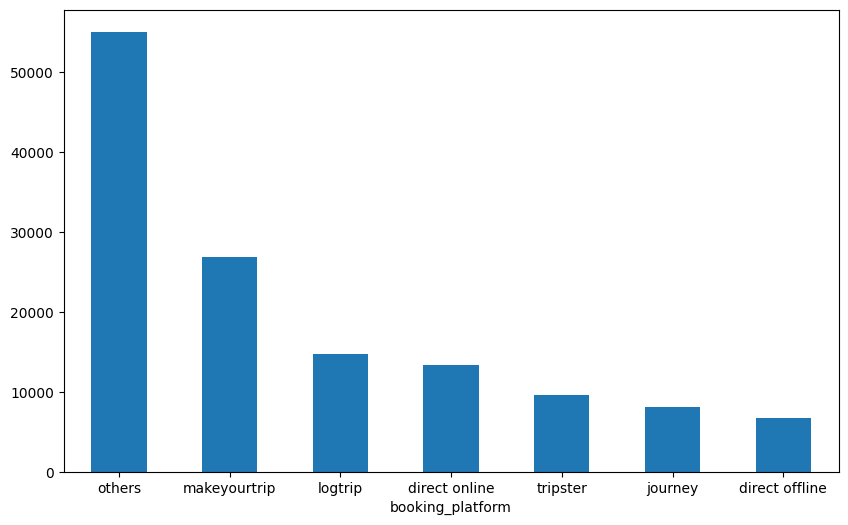

In [16]:
df_bookings.booking_platform.value_counts().plot(kind = "bar",rot = 0,figsize = (10,6))

<Axes: title={'center': 'Booking Platform Distribution'}, xlabel='Platform', ylabel='Number of Bookings'>

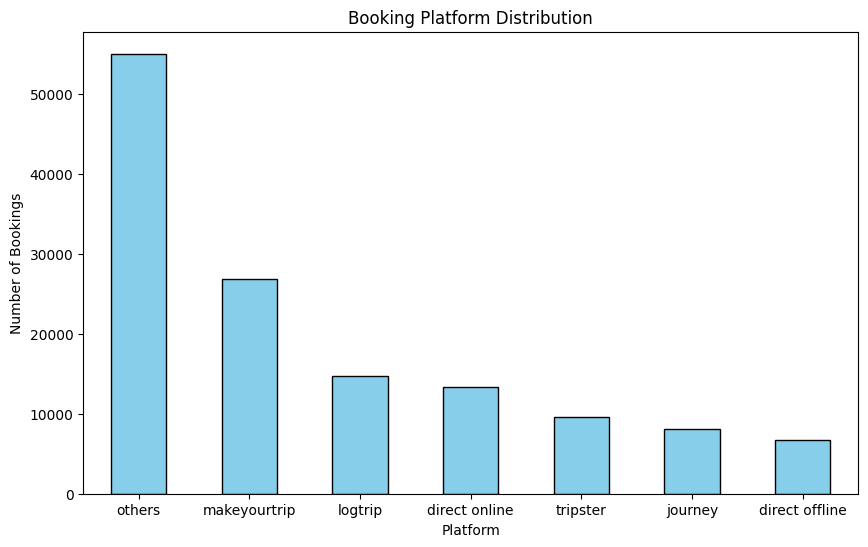

In [8]:
df_bookings.booking_platform.value_counts().plot(kind="bar",
    color="skyblue",         # Bar color
    figsize=(10, 6),         # Size of the figure
    title="Booking Platform Distribution",  # Title
    xlabel="Platform",       # X-axis label
    ylabel="Number of Bookings",  # Y-axis label
    #grid=True,               # Add grid lines
    edgecolor="black",       # Edge color of bars
    rot=0                  # Rotate x-axis labels for better readability
)


In [9]:
df_bookings.describe()


,property_id,no_guests,ratings_given,revenue_generated,revenue_realized
count,134590.000000,134590.000000,56683.000000,134590.000000,134590.000000
mean,18061.113493,2.036808,3.619004,14916.013188,12696.123256
std,1093.055847,1.031766,1.235009,6452.868072,6928.108124
min,16558.000000,1.000000,1.000000,6500.000000,2600.000000
25%,17558.000000,1.000000,3.000000,9900.000000,7600.000000
50%,17564.000000,2.000000,4.000000,13500.000000,11700.000000
75%,18563.000000,2.000000,5.000000,18000.000000,15300.000000
max,19563.000000,6.000000,5.000000,45220.000000,45220.000000


***

**read remaining datasets**

In [17]:
df_dates = pd.read_csv("./datasets/dim_date.csv")
df_hotels = pd.read_csv("./datasets/dim_hotels.csv")
df_rooms = pd.read_csv("./datasets/dim_rooms.csv")
df_aggregated_bookings = pd.read_csv("./datasets/fact_aggregated_bookings.csv")

**Exploring dim_rooms.csv**

In [18]:
df_rooms.head()

,room_id,room_class
0,RT1,Standard
1,RT2,Elite
2,RT3,Premium
3,RT4,Presidential


**Exploring dim_hotels.csv**

In [20]:
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [21]:
df_hotels.shape

(25, 4)

In [22]:
df_hotels.category.unique()

array(['Luxury', 'Business'], dtype=object)

In [23]:
df_hotels.category.value_counts()

category
Luxury      16
Business     9
Name: count, dtype: int64

In [24]:
df_hotels.city.unique()

array(['Delhi', 'Mumbai', 'Hyderabad', 'Bangalore'], dtype=object)

In [25]:
df_hotels.city.value_counts()

city
Mumbai       8
Hyderabad    6
Bangalore    6
Delhi        5
Name: count, dtype: int64

<Axes: title={'center': 'Booking Platform Distribution'}, xlabel='Platform', ylabel='Number of Bookings'>

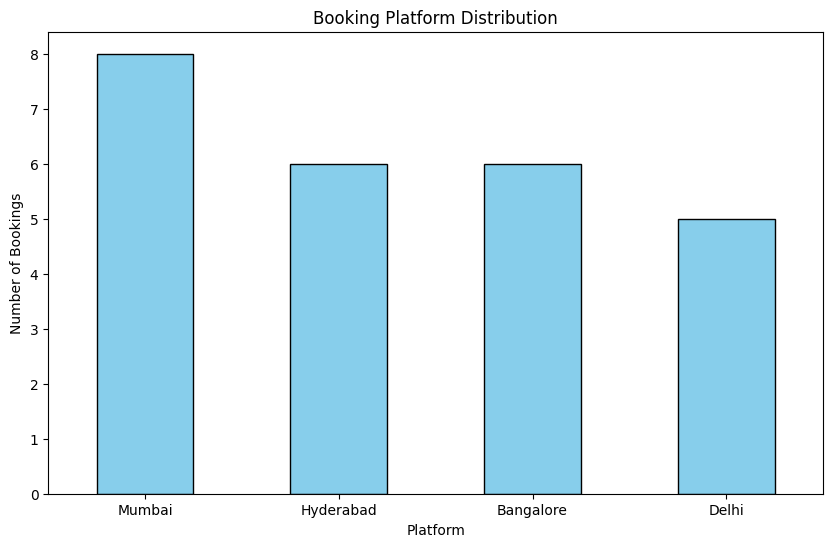

In [26]:
df_hotels.city.value_counts().plot(kind="bar",
    color="skyblue",         # Bar color
    figsize=(10, 6),         # Size of the figure
    title="Booking Platform Distribution",  # Title
    xlabel="Platform",       # X-axis label
    ylabel="Number of Bookings",  # Y-axis label
    #grid=True,               # Add grid lines
    edgecolor="black",       # Edge color of bars
    rot=0                  # Rotate x-axis labels for better readability
)

**Exploring fact_aggregated_booking.csv**

In [27]:
df_aggregated_bookings

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,01-May-22,RT1,25,30
1,19562,01-May-22,RT1,28,30
2,19563,01-May-22,RT1,23,30
3,17558,01-May-22,RT1,13,19
4,16558,01-May-22,RT1,18,19
...,...,...,...,...,...
9195,16563,31-Jul-22,RT4,13,18
9196,16559,31-Jul-22,RT4,13,18
9197,17558,31-Jul-22,RT4,3,6
9198,19563,31-Jul-22,RT4,3,6


In [46]:
df_aggregated_bookings[df_aggregated_bookings.successful_bookings > df_aggregated_bookings.capacity].count()

property_id            0
check_in_date          0
room_category          0
successful_bookings    0
capacity               0
dtype: int64

In [30]:
df_aggregated_bookings

array([16559, 19562, 19563, 17558, 16558, 17560, 19558, 19560, 17561,
       16560, 16561, 16562, 16563, 17559, 17562, 17563, 18558, 18559,
       18561, 18562, 18563, 19559, 19561, 17564, 18560])

In [36]:
aggregated_group = df_aggregated_bookings.groupby('property_id')

In [42]:
    df_aggregated_bookings[df_aggregated_bookings.capacity == df_aggregated_bookings.capacity.max()]

,property_id,check_in_date,room_category,successful_bookings,capacity
27,17558,01-May-22,RT2,38,50
128,17558,02-May-22,RT2,27,50
229,17558,03-May-22,RT2,26,50
328,17558,04-May-22,RT2,27,50
428,17558,05-May-22,RT2,29,50
...,...,...,...,...,...
8728,17558,27-Jul-22,RT2,22,50
8828,17558,28-Jul-22,RT2,21,50
8928,17558,29-Jul-22,RT2,23,50
9028,17558,30-Jul-22,RT2,32,50


In [47]:
df_aggregated_bookings.groupby('property_id')['successful_bookings'].sum()

property_id
16558    3153
16559    7338
16560    4693
16561    4418
16562    4820
16563    7147
17558    5036
17559    6142
17560    6013
17561    5183
17562    3424
17563    6337
17564    3982
18558    4475
18559    5256
18560    6638
18561    6458
18562    7333
18563    4728
19558    4371
19559    4705
19560    5979
19561    5736
19562    5812
19563    5413
Name: successful_bookings, dtype: int64

***
## 1. Data Cleaning
***